In [32]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets

print(sys.version)
for m in [tf, np, pd, mpl]:
    print(m.__name__, 'version:', m.__version__)

3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
tensorflow version: 2.3.1
numpy version: 1.18.5
pandas version: 1.1.3
matplotlib version: 3.3.2


Load the MINST dataset

In [12]:
(x, y), (x_val, y_val) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [14]:
x = 2*tf.convert_to_tensor(x, dtype=tf.float32)/255.-1 # Normalize and rescale to [-1, 1]
y = tf.convert_to_tensor(y, dtype=tf.int32)
y = tf.one_hot(y, depth=10) # onehot encoding
print(x.shape, y.shape)
train_dataset = tf.data.Dataset.from_tensor_slices((x, y))
train_dataset = train_dataset.batch(512)

(60000, 28, 28) (60000, 10)


model building

Samilar to linear model y = w * x + b, but w and x are vector format, so y = w @ x + b

In [38]:
model = keras.Sequential([
    layers.Dense(256, activation = 'relu'), # hiden layer 1
    layers.Dense(128, activation = 'relu'), # hiden layer 2
    layers.Dense(10)
])
optimizer = optimizers.SGD(learning_rate=0.001)

training

In [40]:
def train_epoch(epoch):
    # step 4: loop
    for step, (x, y) in enumerate(train_dataset):

        with tf.GradientTape() as tape:
            # step 1: get output
            x = tf.reshape(x, (-1, 28*28)) # [b, 28, 28] -> [b, 784]
            out = model(x)
            # step 2: calculate loss
            loss = tf.reduce_sum(tf.square(out - y)) / x.shape[0]
        # Step3. optimize and update w & b
        grads = tape.gradient(loss, model.trainable_variables)
        # w' = w - lr * grad
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
        
        if step % 100 == 0:
            print(epoch, step, 'loss:', loss.numpy())

0 0 loss: 0.26843852
0 100 loss: 0.25721028
1 0 loss: 0.26693225
1 100 loss: 0.25574034
2 0 loss: 0.2654407
2 100 loss: 0.25430554
3 0 loss: 0.26396757
3 100 loss: 0.25287843
4 0 loss: 0.26253432
4 100 loss: 0.25150537
5 0 loss: 0.26112047
5 100 loss: 0.25016156
6 0 loss: 0.2597256
6 100 loss: 0.24884829
7 0 loss: 0.2583528
7 100 loss: 0.24756417
8 0 loss: 0.25700623
8 100 loss: 0.24631226
9 0 loss: 0.2556783
9 100 loss: 0.24505304
10 0 loss: 0.25437045
10 100 loss: 0.24383089
11 0 loss: 0.25308877
11 100 loss: 0.24263868
12 0 loss: 0.25183997
12 100 loss: 0.2414714
13 0 loss: 0.25061208
13 100 loss: 0.24031994
14 0 loss: 0.2494261
14 100 loss: 0.2391952
15 0 loss: 0.24824058
15 100 loss: 0.23809028
16 0 loss: 0.24707028
16 100 loss: 0.23700501
17 0 loss: 0.24594347
17 100 loss: 0.23594657
18 0 loss: 0.24484336
18 100 loss: 0.23489094
19 0 loss: 0.24376407
19 100 loss: 0.23386107
20 0 loss: 0.24270691
20 100 loss: 0.23284829
21 0 loss: 0.24164444
21 100 loss: 0.23184508
22 0 loss: 0.24

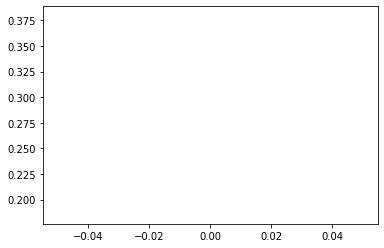

In [42]:
for epoch in range(30):
    train_epoch(epoch)